In [1]:
import torch
import torch.nn as nn 

import matplotlib.pyplot as plt

torch.__version__

'1.13.1'

In [2]:
weight = 0.3
bias = 0.9

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim = 1)

y = weight * X + bias

X[:10], y[:10]



(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.9000],
         [0.9060],
         [0.9120],
         [0.9180],
         [0.9240],
         [0.9300],
         [0.9360],
         [0.9420],
         [0.9480],
         [0.9540]]))

In [10]:
train_split = int(0.8 * len(X))
X_train , y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [11]:
def plot_predictions(train_data=X_train, train_label=y_train, test_data=X_test, test_label=y_test, predictions=None):

    plt.figure(figsize=(10, 7))

    plt.scatter(train_data, train_label, c="b", s=4, label="Training Data")
    
    plt.scatter(test_data, test_label, c="g", s=4, label="Testing Data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    plt.legend(prop={"size": 14})

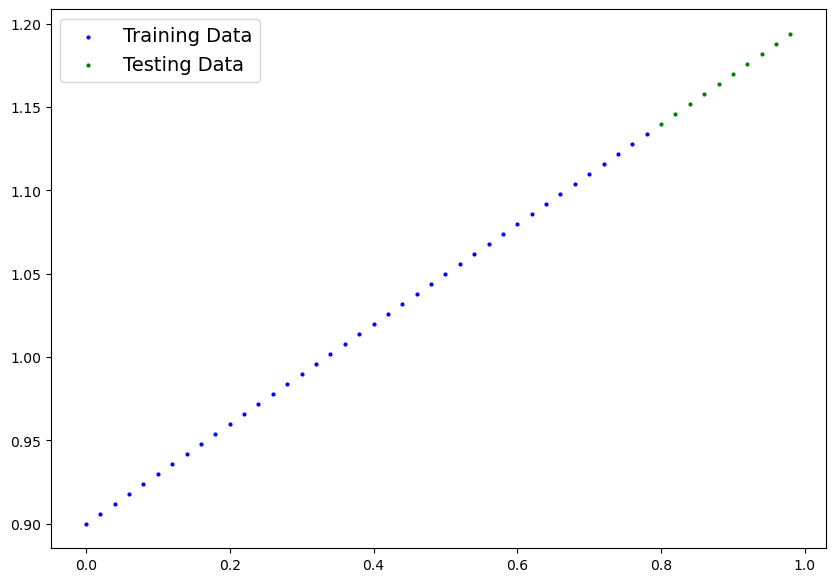

In [12]:
plot_predictions()

In [21]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

In [22]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [23]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [24]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

In [25]:
torch.manual_seed(42)

train_loss_values=[]
test_loss_values=[]
epoch_count=[]

epochs = 300

for epoch in range(epochs):

    # training
    model_0.train()

    y_pred = model_0(X_train)

    loss = loss_fn(y_pred,y_train)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()


    #testing
    model_0.eval()

    with torch.inference_mode():
        test_pred = model_0(X_test)

        test_loss = loss_fn(test_pred, y_test.type(torch.float))

        if epoch%20 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())

            print(f"epoch: {epoch} | MAE train loss: {loss} | MAE test loss: {test_loss} ")


epoch: 0 | MAE train loss: 0.7568813562393188 | MAE test loss: 0.7250651121139526 
epoch: 20 | MAE train loss: 0.5264613628387451 | MAE test loss: 0.4556453227996826 
epoch: 40 | MAE train loss: 0.2960416078567505 | MAE test loss: 0.18622562289237976 
epoch: 60 | MAE train loss: 0.07731032371520996 | MAE test loss: 0.06994309276342392 
epoch: 80 | MAE train loss: 0.0521300844848156 | MAE test loss: 0.11544597148895264 
epoch: 100 | MAE train loss: 0.04509609192609787 | MAE test loss: 0.1043960452079773 
epoch: 120 | MAE train loss: 0.038231261074543 | MAE test loss: 0.08853815495967865 
epoch: 140 | MAE train loss: 0.03136344999074936 | MAE test loss: 0.07268030941486359 
epoch: 160 | MAE train loss: 0.02448992058634758 | MAE test loss: 0.05682243034243584 
epoch: 180 | MAE train loss: 0.01762397214770317 | MAE test loss: 0.04027769714593887 
epoch: 200 | MAE train loss: 0.010759142227470875 | MAE test loss: 0.024419832974672318 
epoch: 220 | MAE train loss: 0.003885951591655612 | MAE 

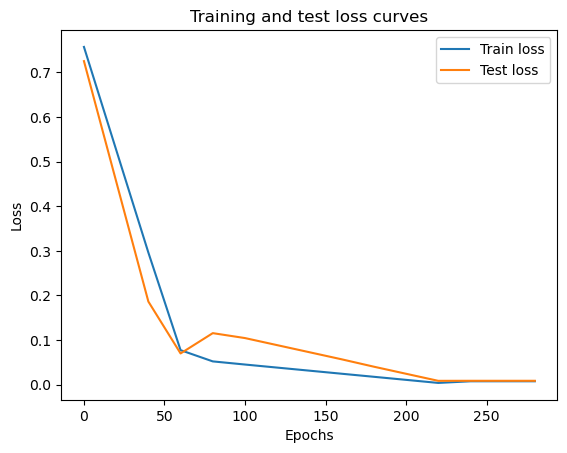

In [26]:
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [27]:
print(model_0.state_dict())
print(weight, bias)

OrderedDict([('weights', tensor([0.3055])), ('bias', tensor([0.8903]))])
0.3 0.9


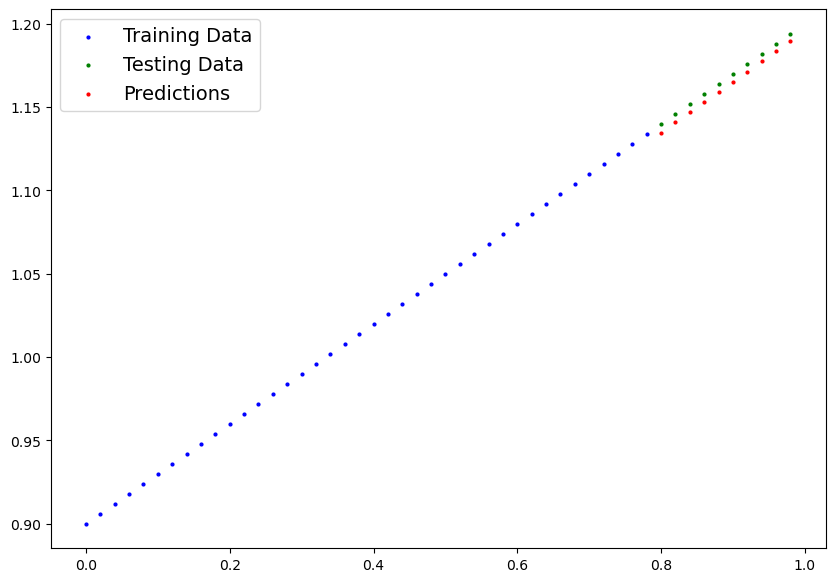

In [33]:
model_0.eval()

with torch.inference_mode():
    y_preds = model_0(X_test)


plot_predictions(predictions=y_preds)

In [34]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "02_pytorch_workflow_practice.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to: {MODEL_SAVE_PATH}")

torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models/02_pytorch_workflow_practice.pth
